In [1]:
%run ../../base-notebook.ipynb

--2023-04-19 15:53:35--  ftp://https/
           => ‘.listing’
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘https’
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-04-19 15:53:35--  https://raw.githubusercontent.com/sodeso-nl/ml-utilities/main/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9458 (9.2K) [text/plain]
Saving to: ‘mlutils.py.1’

mlutils.py.1        100%[===================>]   9.24K  --.-KB/s    in 0.001s  

2023-04-19 15:53:35 (13.4 MB/s) - ‘mlutils.py.1’ saved [9458/9458]

FINISHED --2023-04-19 15:53:35--
Total wall clock time: 0.3s
Downloaded: 1 files, 9.2K in 0.001s (13.4 MB/s)


In [3]:
import sys

sys.path.append("../../ext")

import ext.ml_plot as mlp
import ext.ml_view as mlv

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, InputLayer
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import clone_model
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

## Set up class labels

In [ ]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# Download the Fashion MNIST data set

In [ ]:
# Load the dataset from keras directly and print the number of images / labels.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train size: {len(X_train)}, shape {X_train.shape}")
print(f"y_train size: {len(y_train)}, shape {y_train.shape}")
print(f"X_test size: {len(X_test)}, shape {X_test.shape}")
print(f"y_test size: {len(y_test)}, shape {y_test.shape}")

## Inspect the data, what is the shape? do we need to normalize?

In [ ]:
# Let's look at some of the data to see if we need to perform some normalization.
X_train[:5], y_train[:10]

## Normalize data (0-255 -> 0-1)

In [12]:
# It seems that the color values are ranging from 0 to 255, so we need to normalize the data.
X_train = X_train / 255.
X_test = X_test / 255.

X_train[:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

## Reshape images, need to add the channels to the shape, shape should be (batch, height, width, channels)

In [13]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Visualize the images, se we can see what the images look like and if the class labels match the image shown.

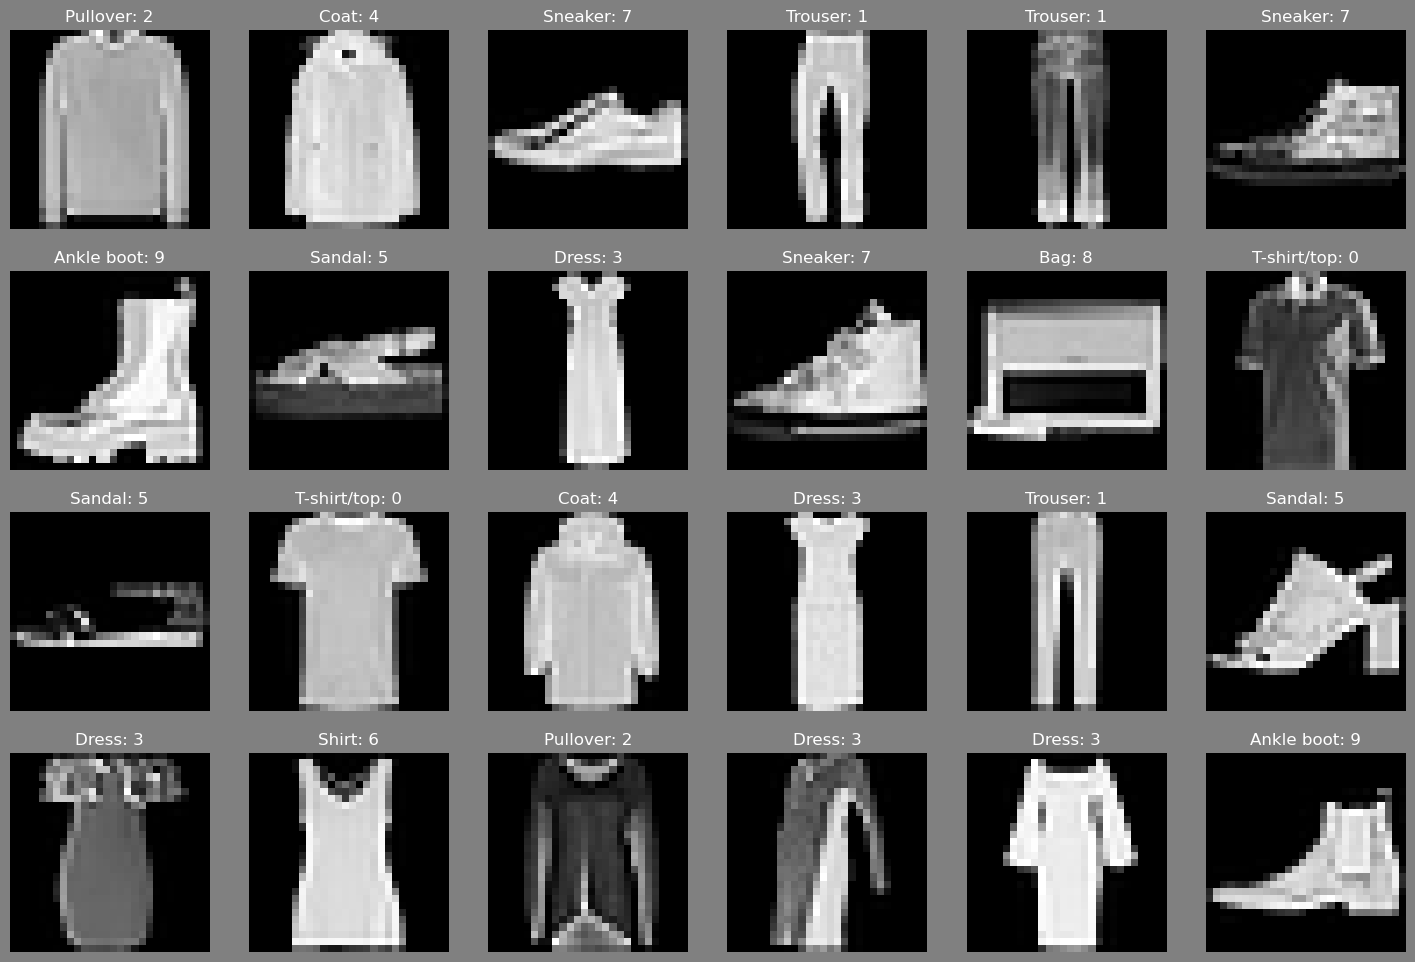

In [33]:
# Visualize a number of images
mlv.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

## One-hot encode the labels

In [14]:
# One-hot encode the labels.
y_train = to_categorical(y_train, dtype=int)
y_test = to_categorical(y_test, dtype=int)

# Show first then entries.
y_train[:10], y_test[:10]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]))

## Inspect if the labels still match with the images

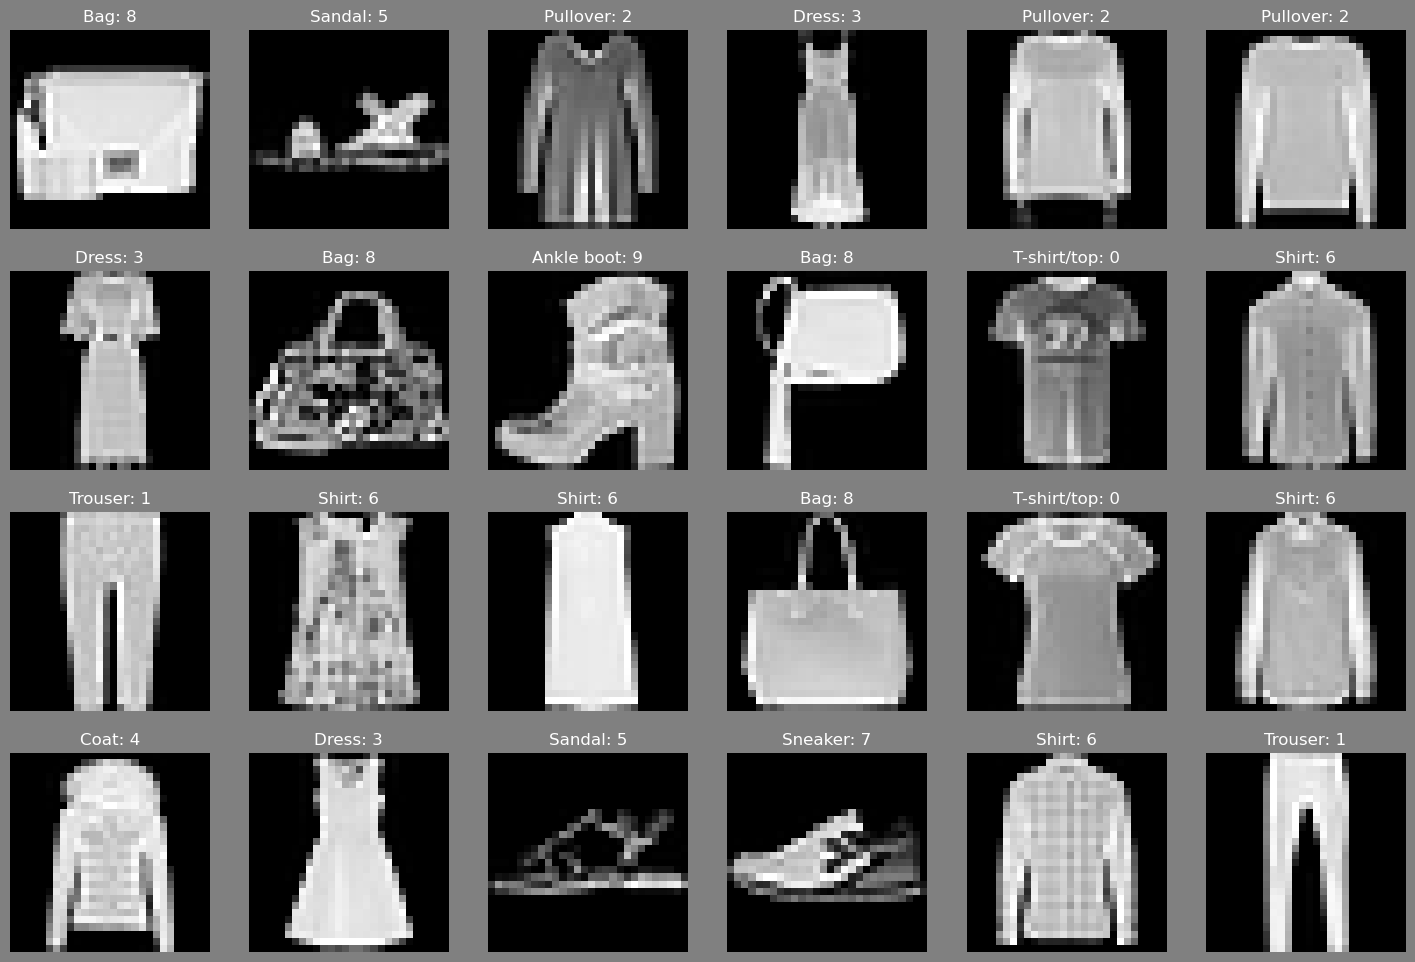

In [35]:
# Let's look at the images again to see if everything is still correct
mlp.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names)

## Create a baseline model from where we can start to improve it

In [36]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(name="Conv2D_1", filters=10, kernel_size=(2, 2), activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(2, 2), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(2, 2), activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.summary()

model_1.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 10)        410       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 10)          410       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 10)        

## Plot the history of model_1, watch out for overfitting and underfitting.

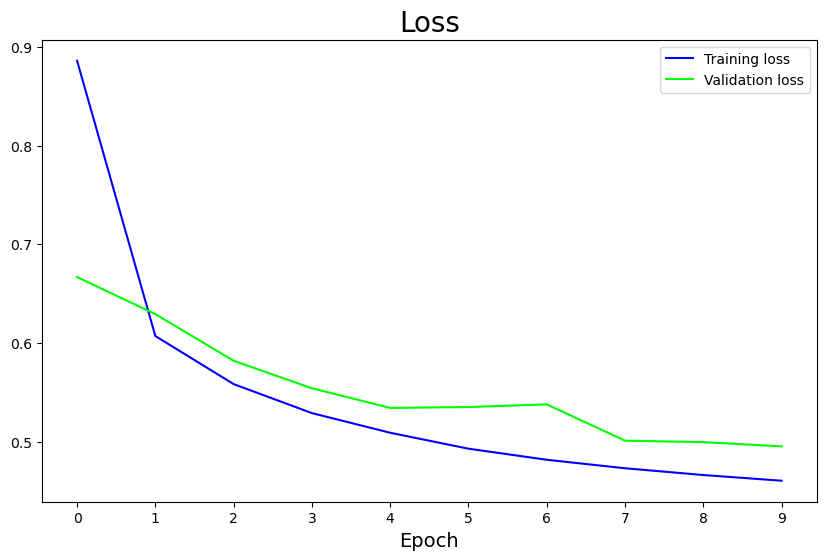

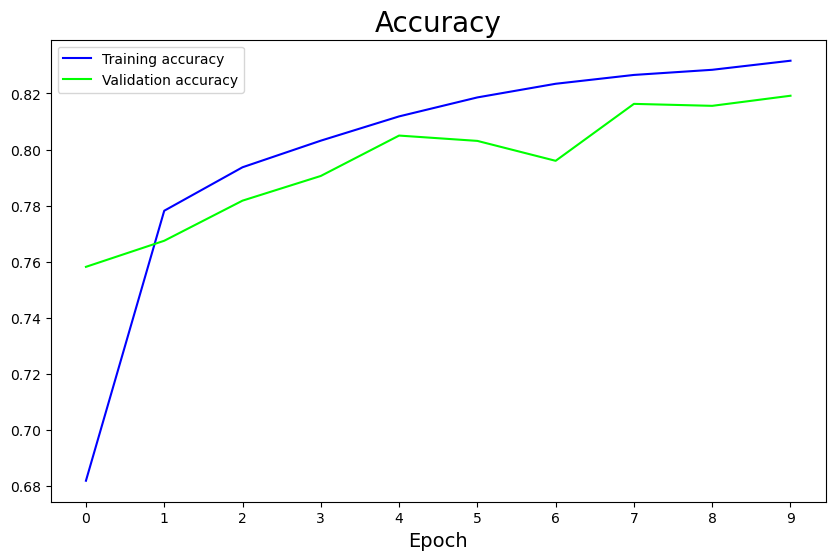

In [37]:
mlp.plot_history(history=history_1)

## Create a confusion matrix of model_1

313/313 [==============================] - 1s 2ms/step


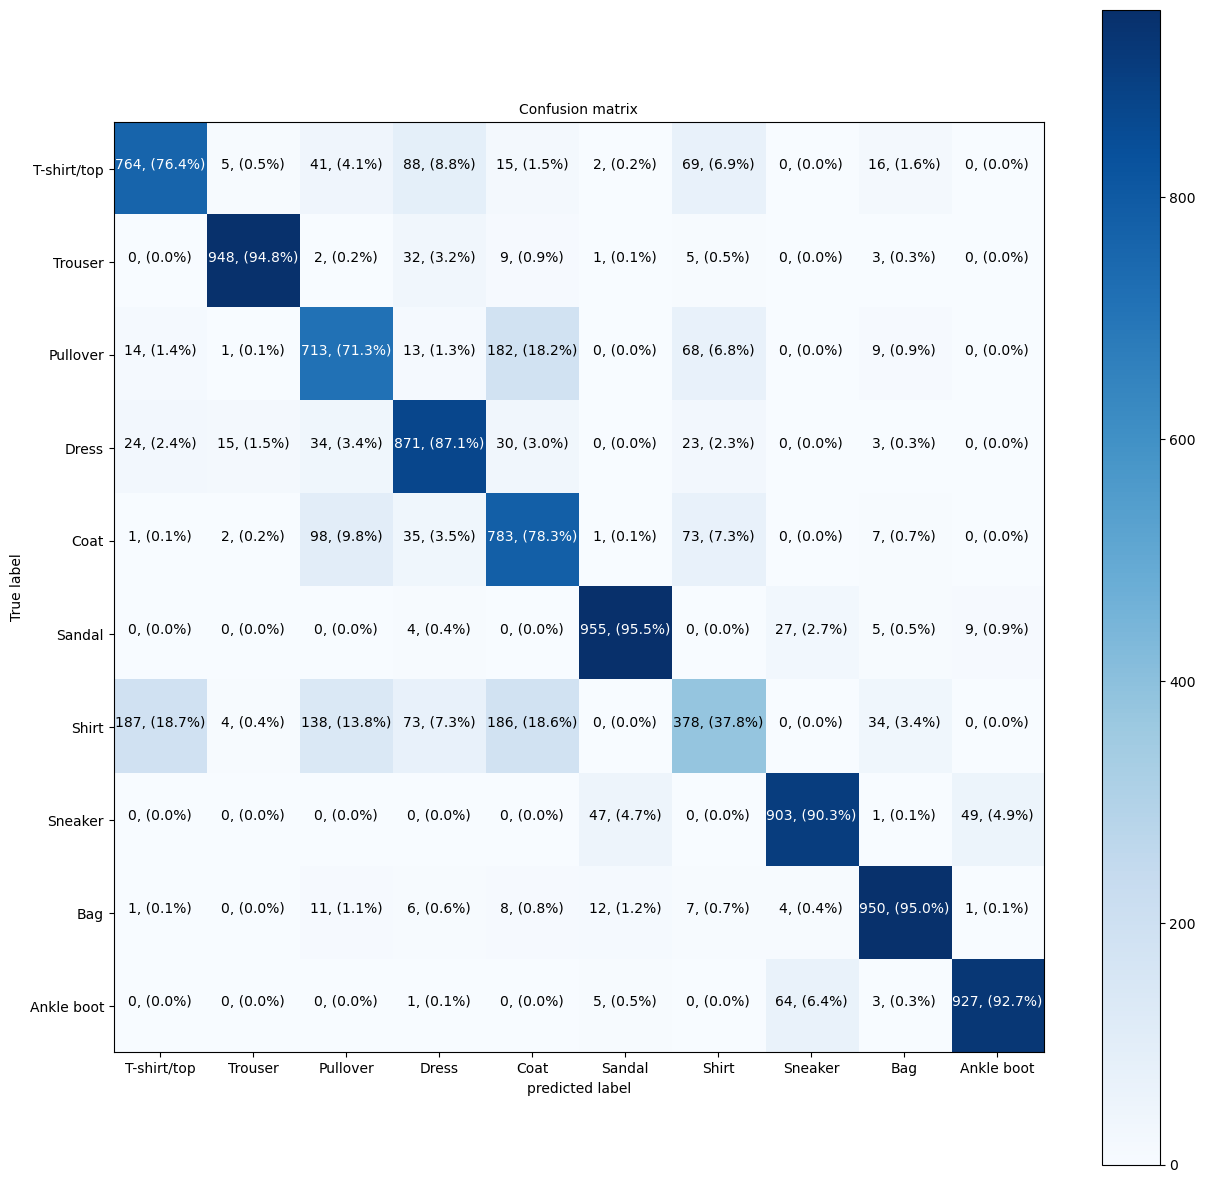

In [38]:
y_pred = model_1.predict(X_test, batch_size=32)

mlp.make_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=class_names, figsize=(15, 15), text_size=10)

## Model_1 was performing quite well, let's make the model a bit more complex.

In [39]:
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(name="Conv2D_1", filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    # MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Conv2D(filters=24, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(rate=0.15),
    Dense(10, activation="softmax")
])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 24)        6936      
                                                      

### Compile and train model_2

In [ ]:
model_2.compile(loss=categorical_crossentropy,
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_test, y_test))

## Display the loss and validation history for Model_2

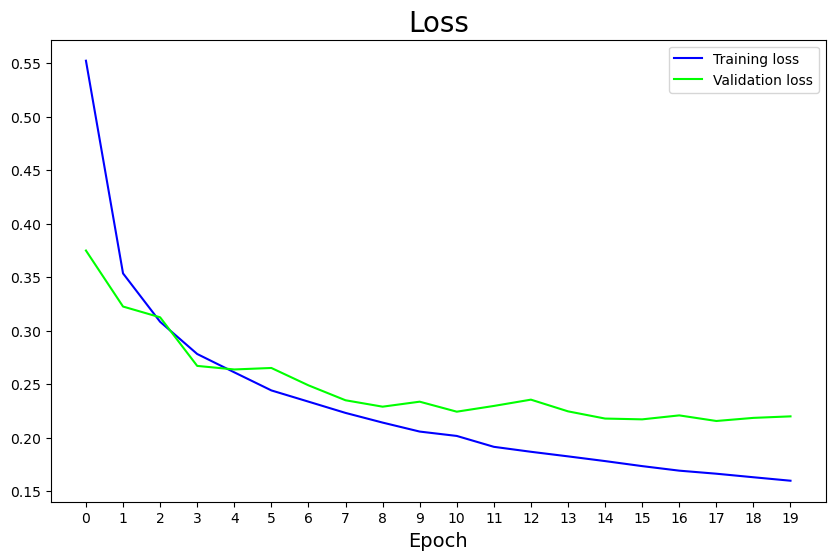

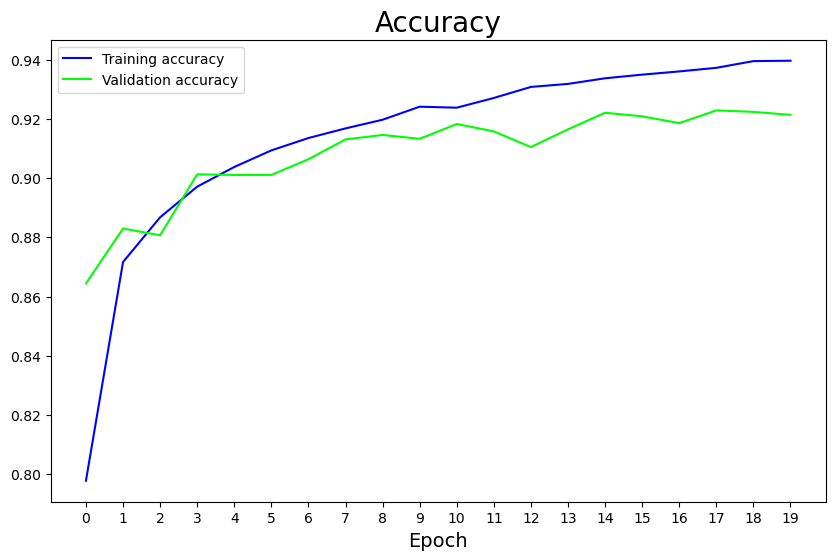

In [40]:
mlp.plot_history(history=history_2)

## Create a confusion-matrix for Model_2

313/313 [==============================] - 1s 3ms/step


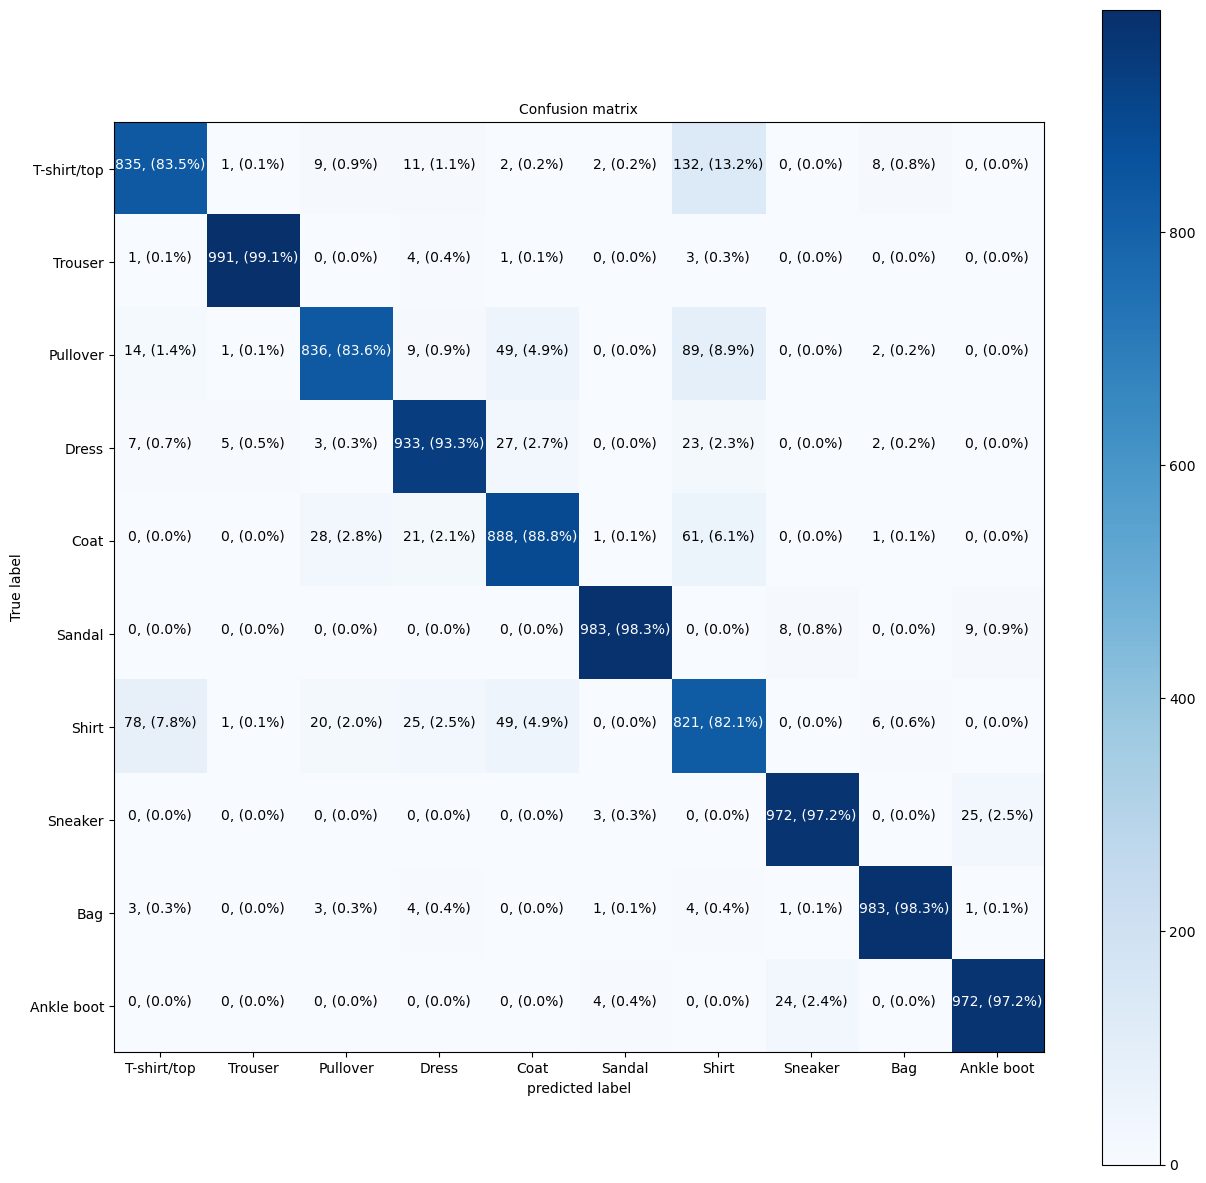

In [41]:
y_pred = model_2.predict(X_test, batch_size=32)

mlp.make_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=class_names, figsize=(15, 15), text_size=10)

## Add data augmentation to see if this improves the results

In [66]:
datagen_train = ImageDataGenerator(
        height_shift_range=0.2,
        width_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')
datagen_train.fit(X_train)

datagen_test = ImageDataGenerator(
        height_shift_range=0.2,
        width_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')
datagen_test.fit(X_test)

In [67]:
batch_size=64

train_data = datagen_train.flow(X_train, y_train, batch_size=batch_size, shuffle=True, seed=42)
test_data = datagen_test.flow(X_test, y_test, batch_size=batch_size, shuffle=True, seed=42)

In [117]:
images, labels = train_data.next()
mlp.show_images_from_nparray_or_tensor(x=images, y=labels, class_names=class_names)

TypeError: object of type 'NoneType' has no len()

### Create model_3 to use the data augmentation

In [69]:
tf.random.set_seed(42)

model_3 = clone_model(model_2)

model_3.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        batch_size=batch_size,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/50
938/938 [==============================] - 17s 17ms/step - loss: 0.9179 - accuracy: 0.6574 - val_loss: 0.6538 - val_accuracy: 0.7581
Epoch 2/50
938/938 [==============================] - 15s 16ms/step - loss: 0.6341 - accuracy: 0.7592 - val_loss: 0.5530 - val_accuracy: 0.7982
Epoch 3/50
938/938 [==============================] - 16s 17ms/step - loss: 0.5597 - accuracy: 0.7890 - val_loss: 0.5085 - val_accuracy: 0.8113
Epoch 4/50
938/938 [==============================] - 16s 17ms/step - loss: 0.5161 - accuracy: 0.8067 - val_loss: 0.4883 - val_accuracy: 0.8148
Epoch 5/50
492/938 [==============>...............] - ETA: 7s - loss: 0.4953 - accuracy: 0.8158

KeyboardInterrupt: 

## Display the loss and validation history for Model_3

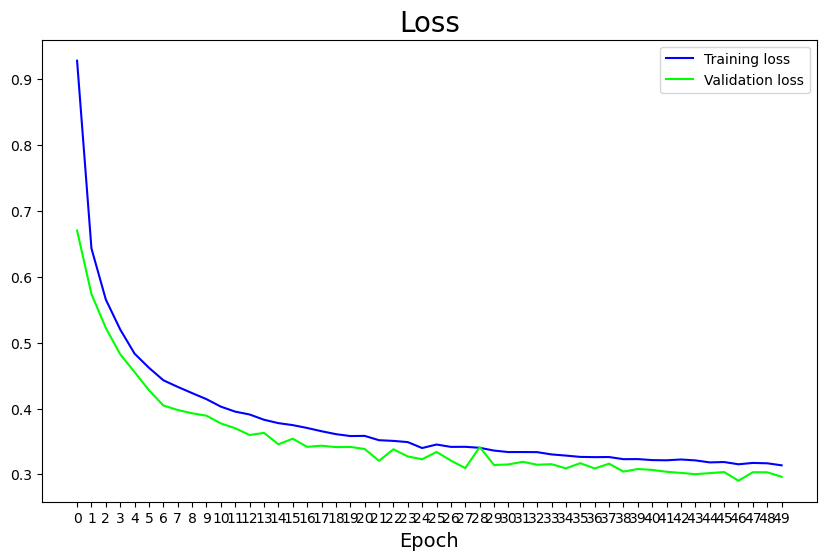

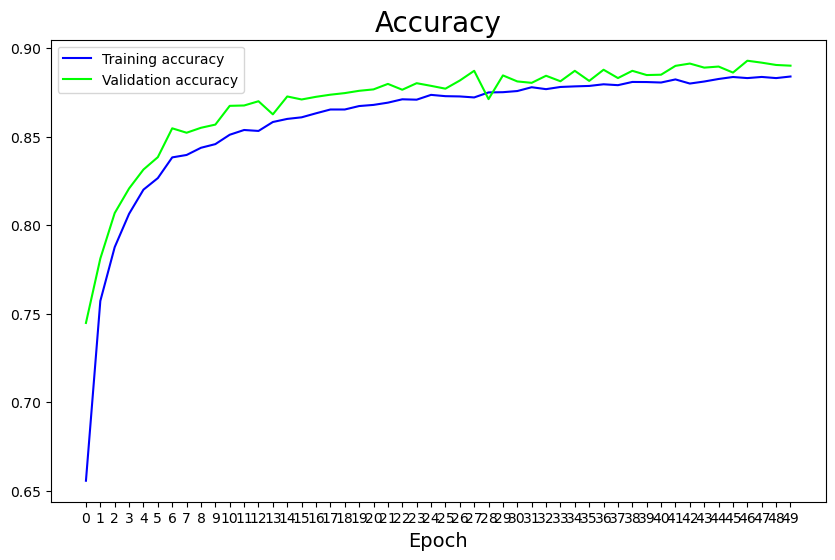

In [46]:
mlp.plot_history(history=history_3)

### Create a more complex model_4 and let's tune it to see if we can improve results.

In [16]:
tf.random.set_seed(42)

model_4 = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(filters=48, kernel_size=3, activation="relu", padding="same"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=48, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(128, activation="relu"), # 256
    Dropout(rate=0.25),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 48)        480       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 48)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 48)        20784     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 48)         

### Compile and fit the model_4

In [135]:
batch_size = 64

model_4.compile(loss=categorical_crossentropy,
                optimizer=Adam(learning_rate=0.002),
                metrics=["accuracy"])

history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test))

Epoch 1/50
938/938 [==============================] - 20s 21ms/step - loss: 0.4932 - accuracy: 0.8174 - val_loss: 0.3434 - val_accuracy: 0.8766
Epoch 2/50
938/938 [==============================] - 17s 19ms/step - loss: 0.3238 - accuracy: 0.8813 - val_loss: 0.3136 - val_accuracy: 0.8838
Epoch 3/50
938/938 [==============================] - 19s 20ms/step - loss: 0.2846 - accuracy: 0.8950 - val_loss: 0.2718 - val_accuracy: 0.8998
Epoch 4/50
938/938 [==============================] - 18s 19ms/step - loss: 0.2627 - accuracy: 0.9028 - val_loss: 0.2585 - val_accuracy: 0.9031
Epoch 5/50
938/938 [==============================] - 18s 19ms/step - loss: 0.2497 - accuracy: 0.9075 - val_loss: 0.2483 - val_accuracy: 0.9093
Epoch 6/50
938/938 [==============================] - 17s 18ms/step - loss: 0.2336 - accuracy: 0.9121 - val_loss: 0.2455 - val_accuracy: 0.9094
Epoch 7/50
938/938 [==============================] - 17s 18ms/step - loss: 0.2253 - accuracy: 0.9157 - val_loss: 0.2472 - val_accuracy:

### Plot fit history of model_4

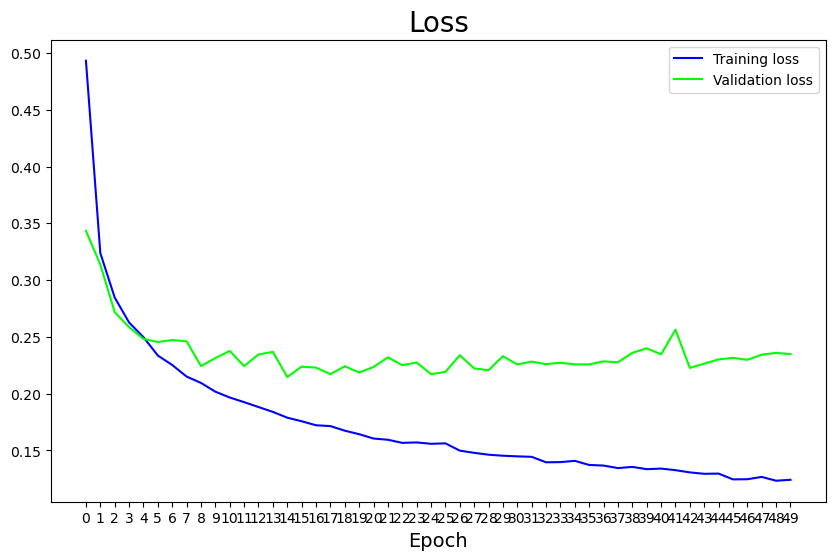

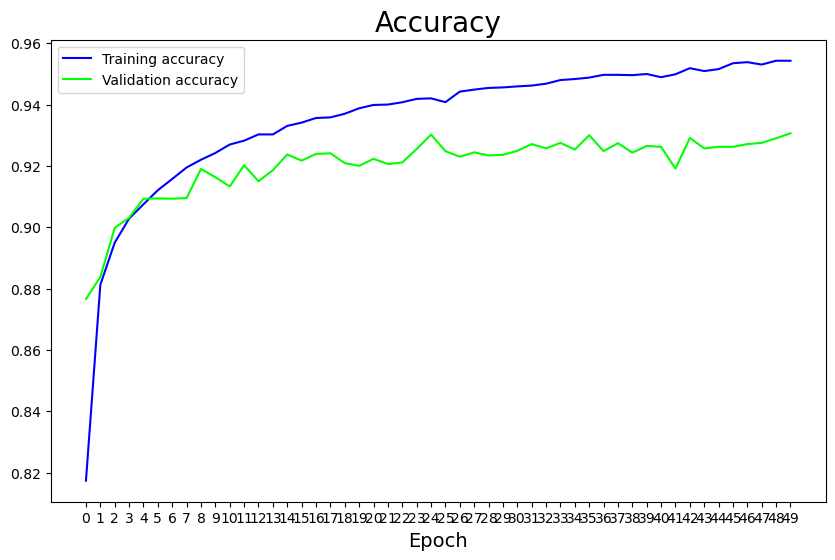

In [136]:
mlp.plot_history(history=history_4)

### Create confusion matrix for model_4

313/313 [==============================] - 1s 3ms/step


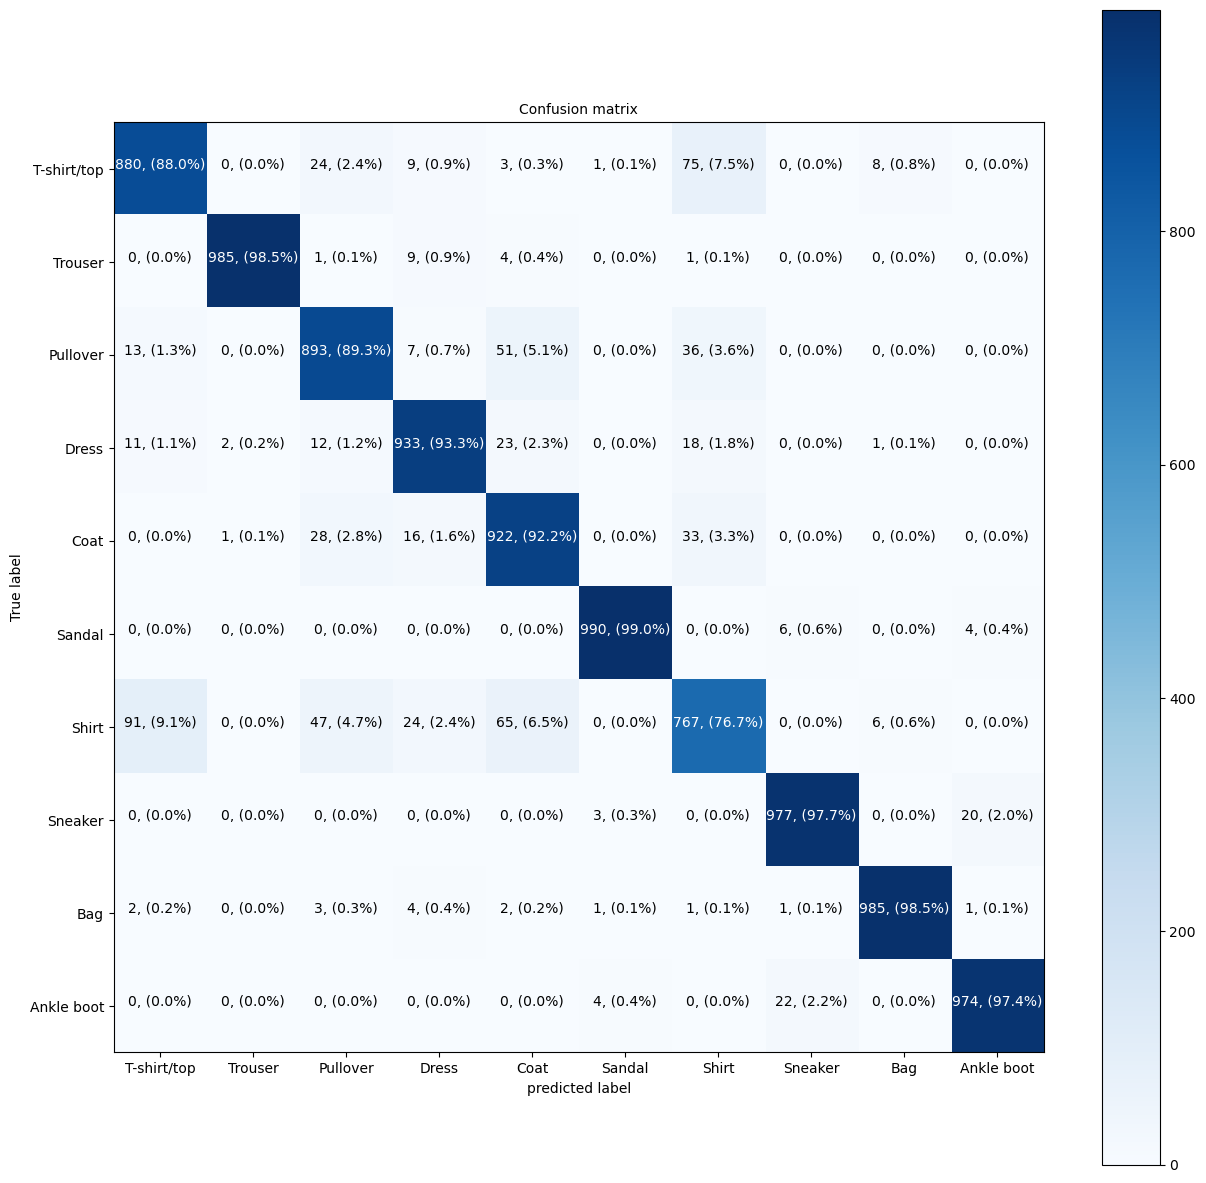

In [141]:
y_pred = model_4.predict(X_test, batch_size=32)
mlp.make_confusion_matrix(x=y_test, y=y_pred, classes=class_names, figsize=(15, 15), text_size=10)

## Try different batch sizes

Epoch 1/50
3750/3750 [==============================] - 46s 12ms/step - loss: 0.4534 - accuracy: 0.8333 - val_loss: 0.3481 - val_accuracy: 0.8771
Epoch 2/50
3750/3750 [==============================] - 45s 12ms/step - loss: 0.3229 - accuracy: 0.8806 - val_loss: 0.3301 - val_accuracy: 0.8778
Epoch 3/50
3750/3750 [==============================] - 45s 12ms/step - loss: 0.2942 - accuracy: 0.8913 - val_loss: 0.3308 - val_accuracy: 0.8768
Epoch 4/50
3750/3750 [==============================] - 46s 12ms/step - loss: 0.2742 - accuracy: 0.9006 - val_loss: 0.2839 - val_accuracy: 0.8944
Epoch 5/50
3750/3750 [==============================] - 45s 12ms/step - loss: 0.2612 - accuracy: 0.9033 - val_loss: 0.2995 - val_accuracy: 0.8883
Epoch 6/50
3750/3750 [==============================] - 44s 12ms/step - loss: 0.2529 - accuracy: 0.9068 - val_loss: 0.2820 - val_accuracy: 0.8988
Epoch 7/50
3750/3750 [==============================] - 43s 11ms/step - loss: 0.2457 - accuracy: 0.9101 - val_loss: 0.2823 -

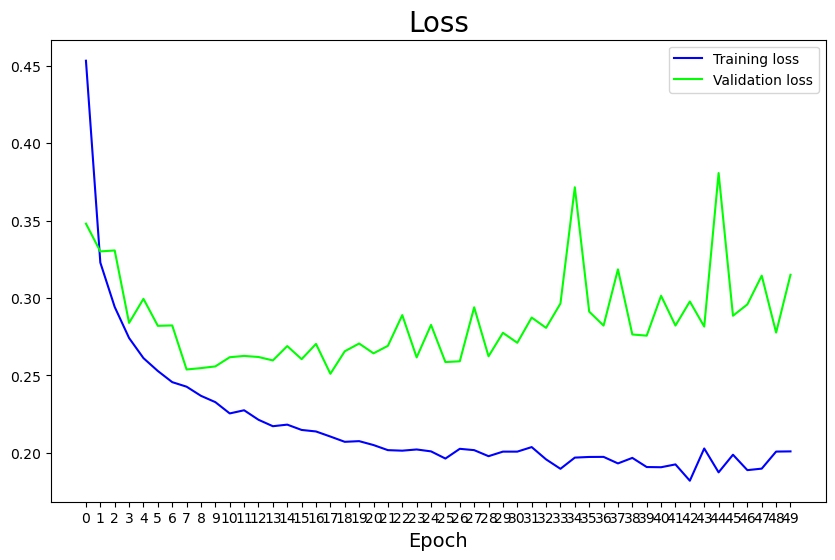

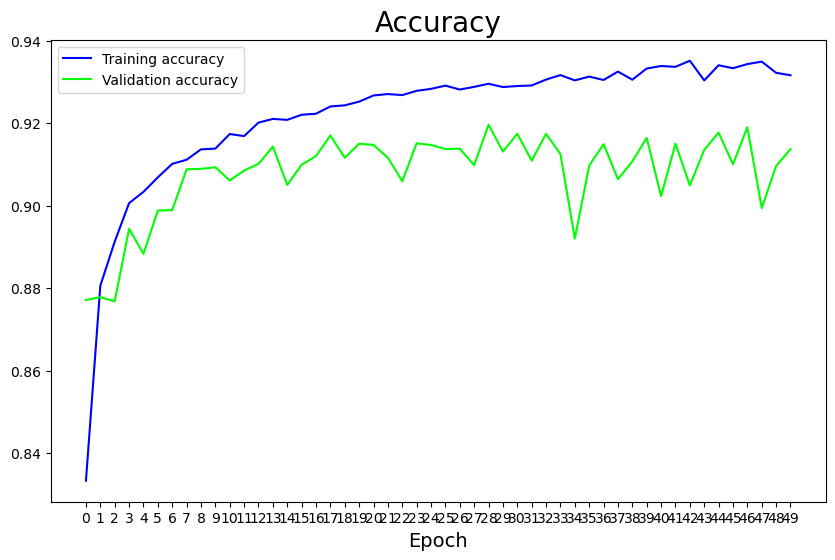

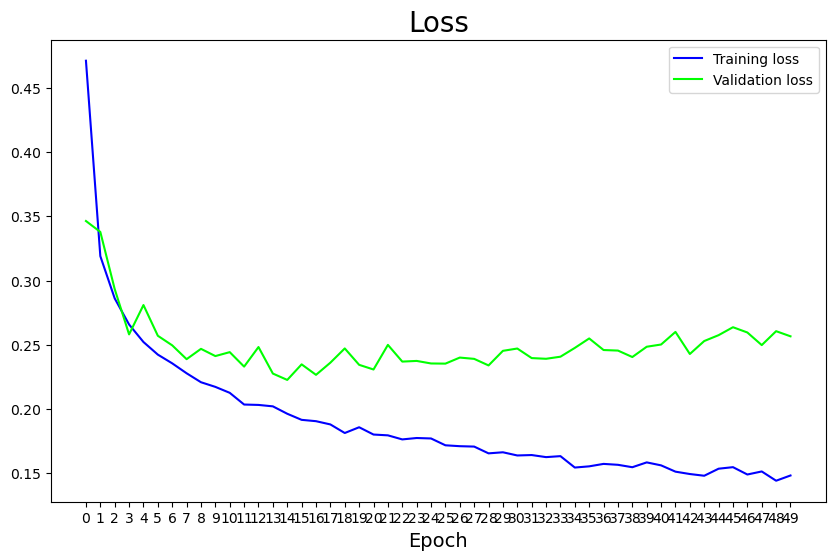

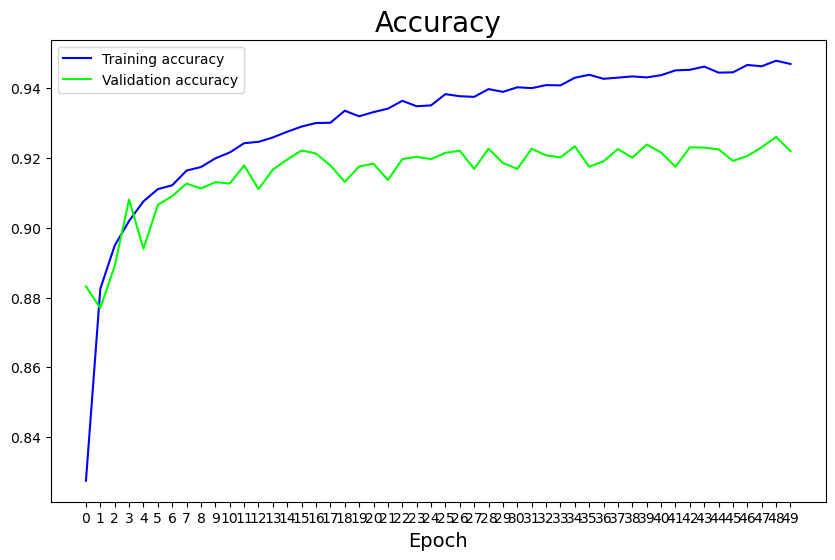

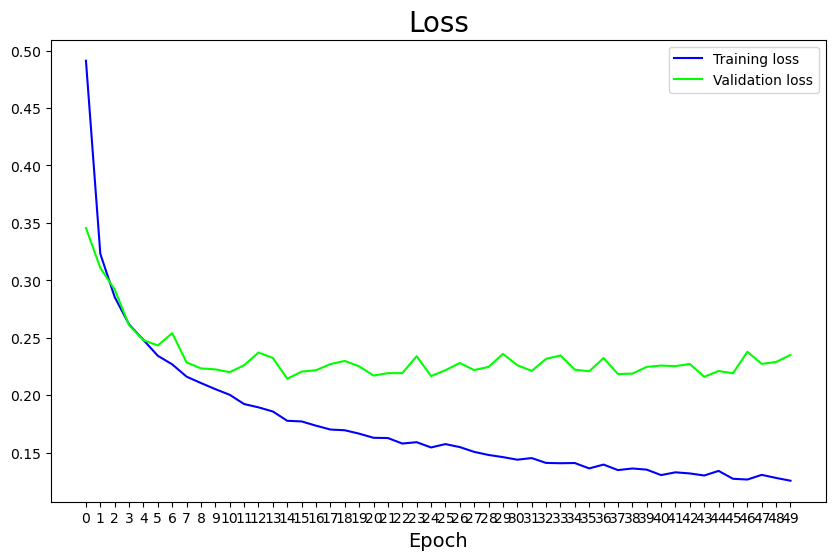

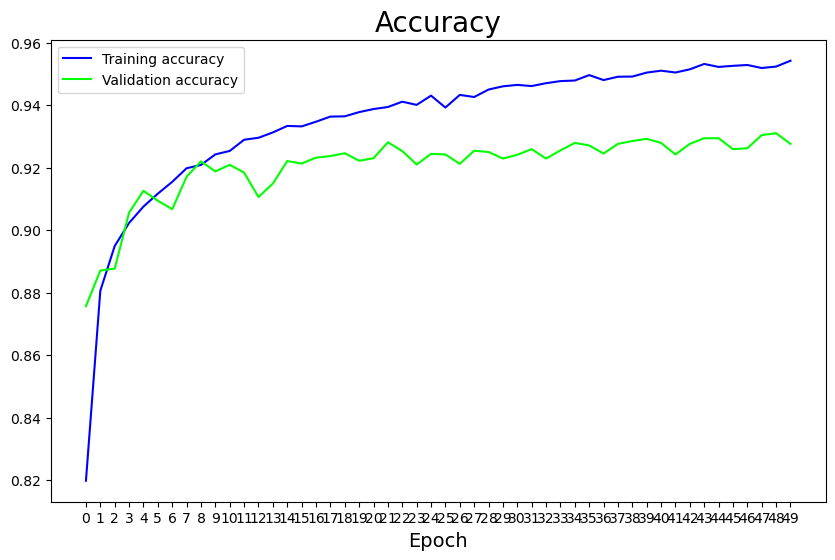

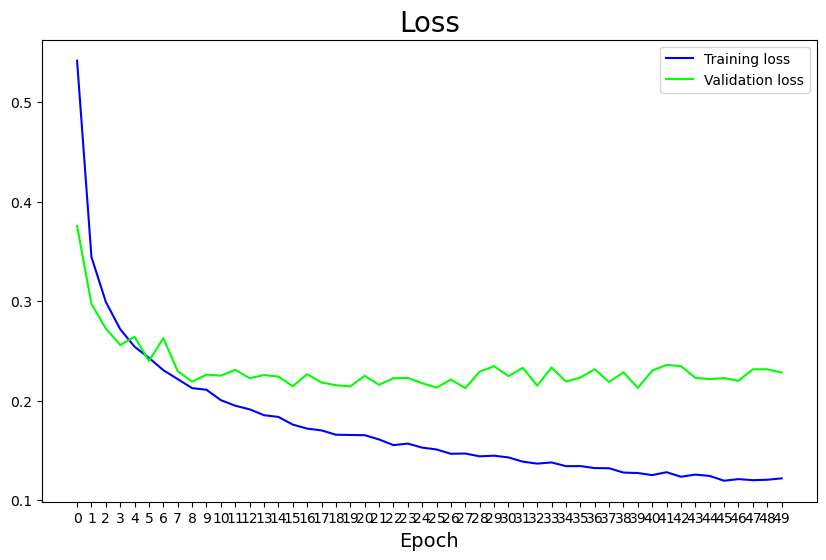

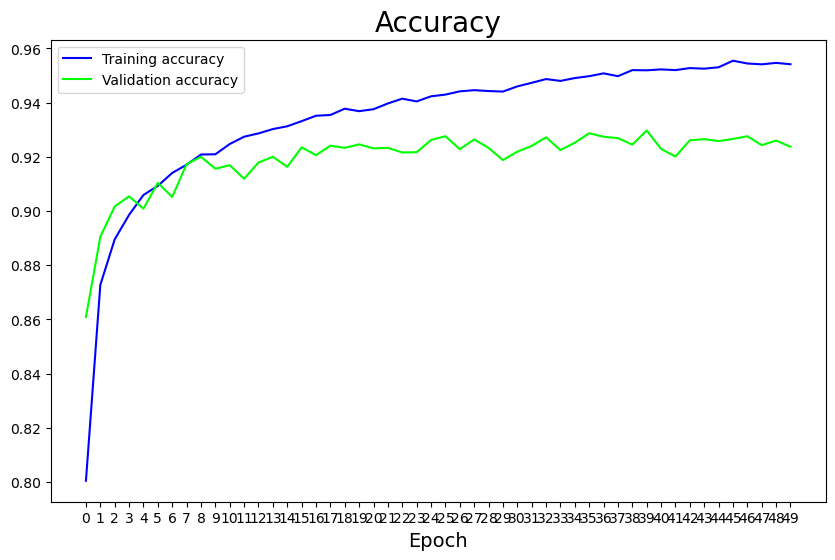

In [15]:
all_history = []
batch_sizes = [16, 32, 64, 128]

for idx, batch_size in enumerate(batch_sizes):
    model_5 = clone_model(model_4)

    model_5.compile(loss=categorical_crossentropy,
                 optimizer=Adam(learning_rate=0.002),
                 metrics=["accuracy"])

    all_history.append(model_5.fit(X_train,
                        y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test)))

for history in all_history:
    mlp.plot_history(history=history)